<style>
.container { width: 80% !important; margin: auto; }
div.cell { padding: 10px 15% 10px 15%; }
</style>

## DTSC 2301 Spring 2025 Homework #1

Turn in your assignment via Gradescope

Due 1/18/25, 11: 59pm

For this assignment you may use any generative AI and you may only use python commands and code we used in class.

If you use genAI for this assigment, please include the following statement in your submission with the [] modified for your particular usage.  If you did not use genAI in this assigment, you may deleate this chunk.

I acknowledge the use of [generative AI tool Name] in the preparation or completion of this assignment. The [generative AI tool Name] was used in the following way(s) in this assignment: [e.g., brainstorming, grammatical correction, citation, which portion of the assignment].

#### Question 1
Read in the Penguins dataset (https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/penguins.csv).  Create a violinplot for penguin bill length, *bill_length_mm*.

In [5]:
from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors

import scipy.stats as stats

In [3]:
url = "https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/penguins.csv"
df = pd.read_csv(url)
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


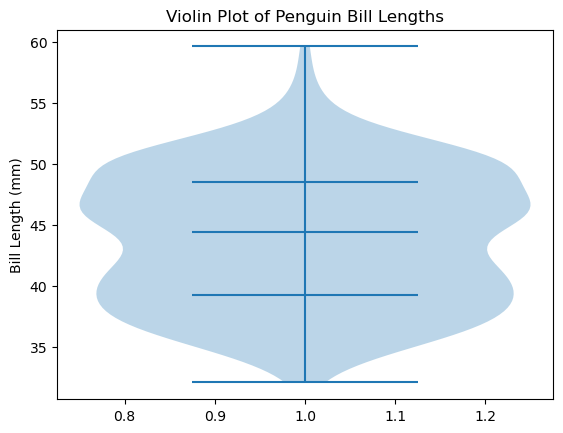

In [4]:
plt.violinplot(df["bill_length_mm"].dropna(), showextrema=True,showmedians=True,quantiles=[0.25,0.75])
plt.title("Violin Plot of Penguin Bill Lengths")
plt.ylabel("Bill Length (mm)")
plt.show()

#### Question 2
Again using the data on bill length of penguins, create and interpret a 95% confidence interval for the mean bill length of a penguin based upon this sample.  

In [7]:
np.random.seed(123)
bill_length = df["bill_length_mm"].dropna()
mean_length = np.mean(bill_length)
print(f"Mean Bill Length: {mean_length:.2f} mm")
n_penguins = len(bill_length)
rows = list(range(1, n_penguins ))
n_reps = 5000
boot_means = []
for i in range(n_reps):
    random_out = np.random.choice(rows, n_penguins)
    bls = bill_length.iloc[random_out]
    avg = np.mean(bls)
    boot_means.append(avg)
print(f"Bootstrap Mean Bill Length: {np.mean(boot_means):.2f} mm")
print(f"Bootstrap Std. Error: {np.std(boot_means):.2f} mm")
np.percentile(boot_means, [2.5, 97.5])

Mean Bill Length: 43.92 mm
Bootstrap Mean Bill Length: 43.94 mm
Bootstrap Std. Error: 0.30 mm


array([43.34589181, 44.53044591])

We get a 95% confidence interval for the mean bill length of all penguins to be between 43.3 mm and 44.53 mm.

#### Question 3
Using the Ames Housing Data (https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/Ames_house_prices.csv), create a 93% confidence interval for the mean above grade (ground) living area square feet (GrLivArea).  Interpret this interval in the context of these data.

In [33]:
import scipy.stats as st
url = "https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/Ames_house_prices.csv"
ames = pd.read_csv(url, na_values=['?'])
ames.replace([' ?'],np.nan)
living_area = ames["GrLivArea"].dropna()
ames.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
print('Mean Living Area:', np.round(np.mean(living_area),2))
print("Std Dev Living Area:",  np.round(np.std(living_area),2))
st.t.interval(0.93, len(living_area)-1, loc=np.mean(living_area), scale=stats.sem(living_area)) 

Mean Living Area: 1515.46
Std Dev Living Area: 525.3


(np.float64(1490.527186636605), np.float64(1540.4002106236692))

We can be 93% confidence that the mean above grade living area square feet of all houses sold in Ames, IA is between 1490.53 and 1540.4 sq feet .

#### Question 4
Using the Ames Housing Data, create a 90% confidence interval for the standard deviation of Sale Price using the bootstrap.  Interpret this interval in the context of these data.

In [31]:
np.random.seed(123)
sale_price = ames["SalePrice"].dropna()
n_sales = len(sale_price)
n_reps = 5000
boot_std = []
for i in range(n_reps):
    sp = np.random.choice(sale_price, n_sales, replace=True)
    stat = np.std(sp, ddof=1)
    boot_std.append(stat)
print(f"Original SD: {np.std(sale_price, ddof=1):.2f}")
ci = np.percentile(boot_std, [5, 95])
print(f"90% CI for SD: {ci[0]:.2f} to {ci[1]:.2f}")

Original SD: 79442.50
90% CI for SD: 74476.03 to 84555.84


We are 90% percent confident that the true Standard Diviation of the Sale price for all houses in the Ames population is between $ 74476.03 and $8455.84

#### Question 5
Write a short 80-120 word paragraph explaining how data scientists should ensure that the analysis and its interpretation that you made about the Ames Housing Data do not inadvertently reinforce bias or inequalities in the housing market.


When analyzing Ames housing data, we need to be carful that our results don't accidently support unfair housing practices. Variables like "Neighborhood" can sometimes act as proxies for historical issues like redlining. If we rely too heavy on them without context, our models might undervalue homes in minority communities. We should check if our if our predictions are consistently off for certain groups to avoid reinforcing these gaps. Also, a high standard deviation in price might actually show gentrification is happening, not just normal variation. As data scientist, it's our job to make sure our code doesn't just auryomate old prejudices.